Dataset Description: The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers.

The dataset has 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

    Sepal length in cm.
    Sepal width in cm.
    Petal length in cm.
    Petal width in cm.
    Class Species


# **Load the dataset and describe it.**

In [1]:
!pip install plotly

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import operator

dataset = px.data.iris()
x = dataset.iloc[:, :4].values



In [3]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


***Checking for missing values***


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

This data set has three varities of Iris Plant


# **The Elbow Method**

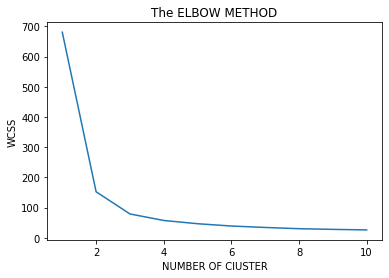

In [6]:
from sklearn.cluster import KMeans
wcss=[] 
for i in range (1,11):
  kmeans= KMeans(n_clusters = i, init= 'k-means++', max_iter=300, n_init=10, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

#Plotting the result 
plt.plot(range(1,11), wcss)
plt.title("The ELBOW METHOD")
plt.xlabel("NUMBER OF ClUSTER")
plt.ylabel("WCSS")
plt.show()



# ***HUE PLOT***

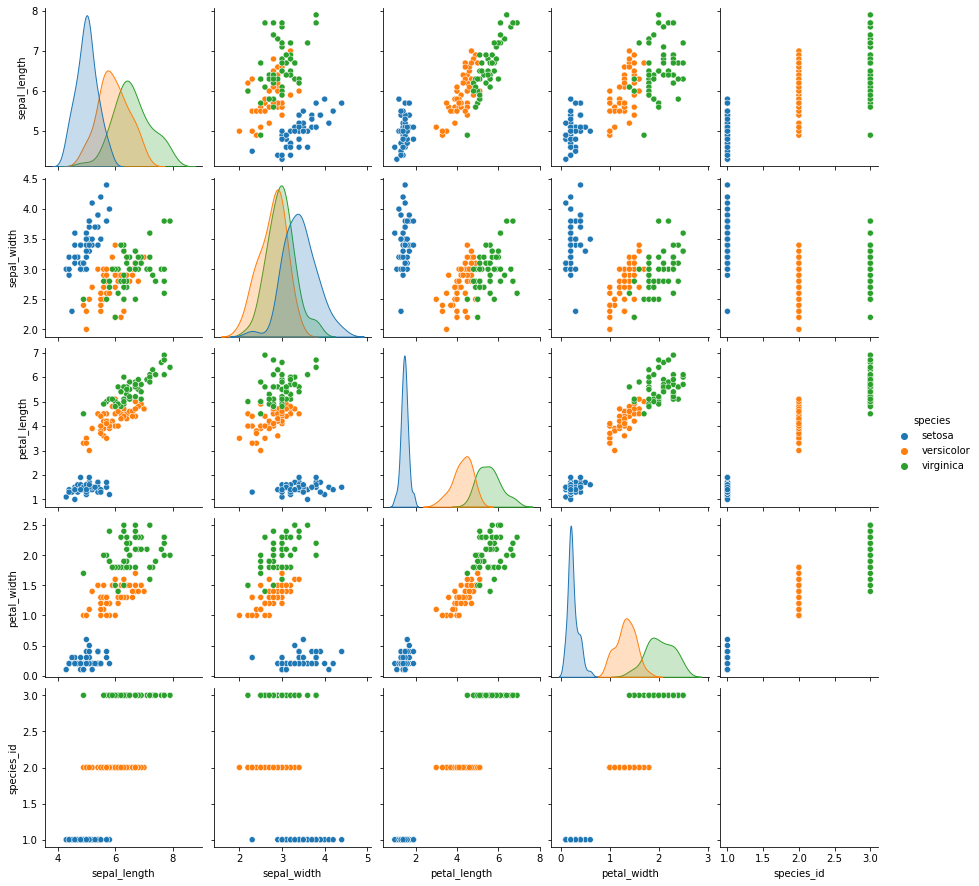

In [7]:
import seaborn as sns
sns.pairplot(dataset, hue = "species")

'HUE' and 'ELBOW' method clearly shows that its operates in cluster and for this we need 3 Cluster for KNN 

# **Split the data as per 80:20 ratios of training and test set.**

In [8]:
dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Getting unique values of dataset

***Establishing Y Variable***

In [9]:
from sklearn.preprocessing import LabelEncoder
labelEnc= LabelEncoder()

dataset['Code'] = labelEnc.fit_transform(dataset['species'])
dataset_code = dataset.drop("species", axis =1)

dataset_code.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,Code
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


*Modeling -- Scaling the data by using sklearn lib*

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset_code.drop(["Code"],axis = 1))

scaled_feat = scaler.transform(dataset_code.drop(["Code"], axis =1))
dataset_feat = pd.DataFrame(scaled_feat, columns = dataset_code.columns[:-1])
x= dataset_feat
y=dataset_code["Code"] 


*Spliting the dataset for training and testing*

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 360)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
print("There are {} samples in the training set and {} samples in th e test set". format(x_train.shape[0], X_test.shape[0]))
print ()


There are 120 samples in the training set and 30 samples in th e test set



In [12]:
predict = knn.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print (confusion_matrix(Y_test, predict))
print (classification_report(Y_test, predict))

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Normalize the dataset. Visualize the dataset before and after normalization.**

Data visualization before dataset. We are trying to visualise the data by Statistically as well as Andrews Curve As we have mulitidimensional Data.

Describing the data : Below Plot gives us a general idea about the dataset.

Text(0.5, 1.0, 'Genral Statistics of Irsi Dataset')

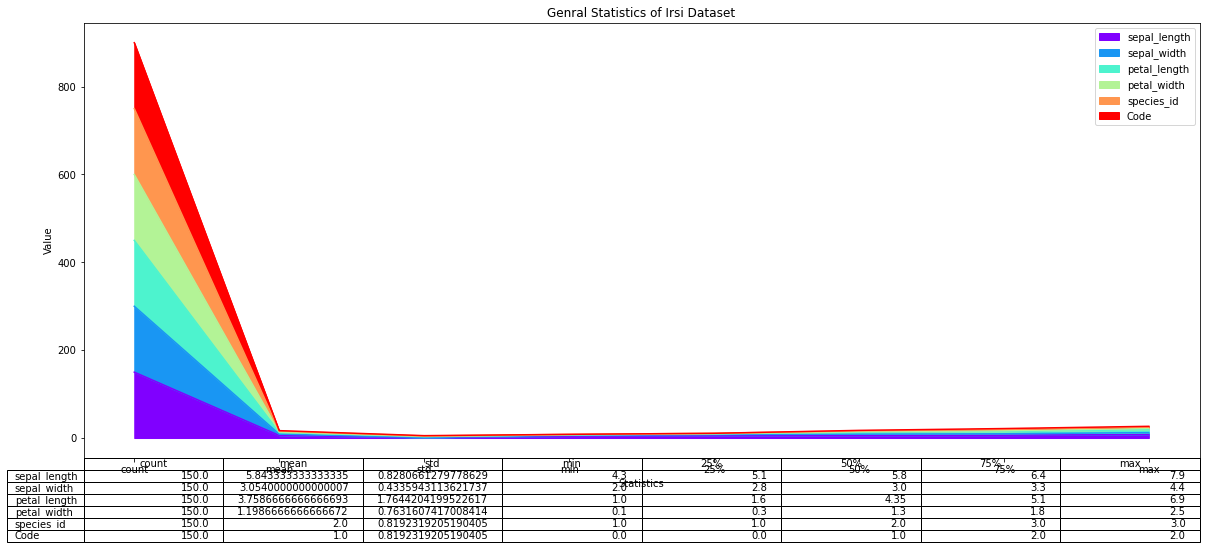

In [14]:
dataset.describe().plot(kind = "area", fontsize = 10, figsize = (20,8), table = True, colormap = "rainbow")
plt.xlabel("Statistics",)
plt.ylabel("Value")
plt.title("Genral Statistics of Irsi Dataset")

ANDREWS CURVE : It help to visualize structure in high dimensional data.Here each mulivariate observation is transformed into a curve and represent the coefficient of a fourier servies.
This is use fil for detecting outlier in times series data/

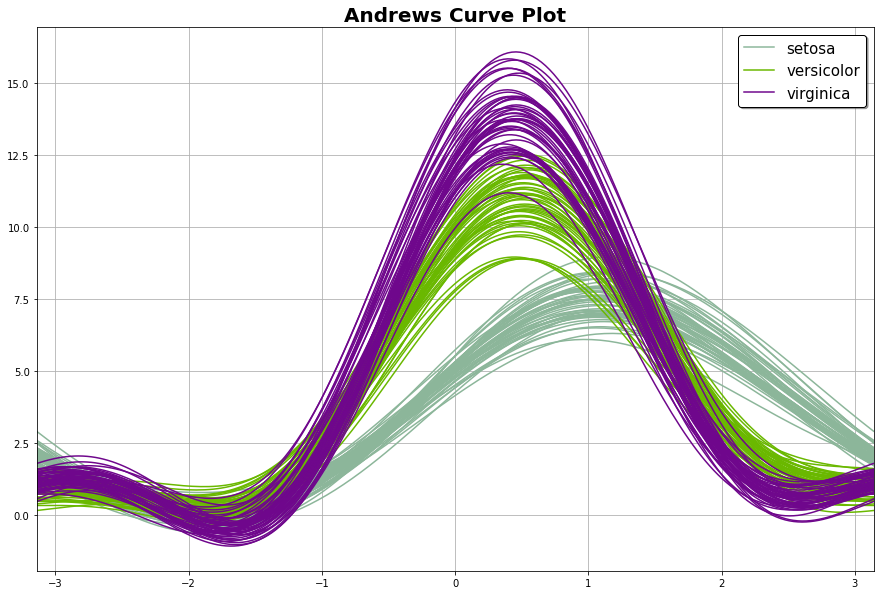

In [15]:
from pandas.plotting import andrews_curves
plt.figure(figsize= (15,10))
andrews_curves(dataset.drop("species_id", axis=1), "species")
plt.title("Andrews Curve Plot", fontsize=20, fontweight = "bold")
plt.legend(loc=1, prop={'size':15 }, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

# **Normalizing DataSet**

In [16]:
from sklearn.preprocessing import MinMaxScaler
dataset_fn= dataset.copy()
min_max_scaler = MinMaxScaler()
dataset_fn.iloc[:, [0,1,2,3,6]] = min_max_scaler.fit_transform(dataset_fn.iloc[:, [0,1,2,3,6]])
dataset_fn.head()


,sepal_length,sepal_width,petal_length,petal_width,species,species_id,Code
0,0.222222,0.625000,0.067797,0.041667,setosa,1,0.0
1,0.166667,0.416667,0.067797,0.041667,setosa,1,0.0
2,0.111111,0.500000,0.050847,0.041667,setosa,1,0.0
3,0.083333,0.458333,0.084746,0.041667,setosa,1,0.0
4,0.194444,0.666667,0.067797,0.041667,setosa,1,0.0


**Andrews Curve : After Normalizing DataSet**

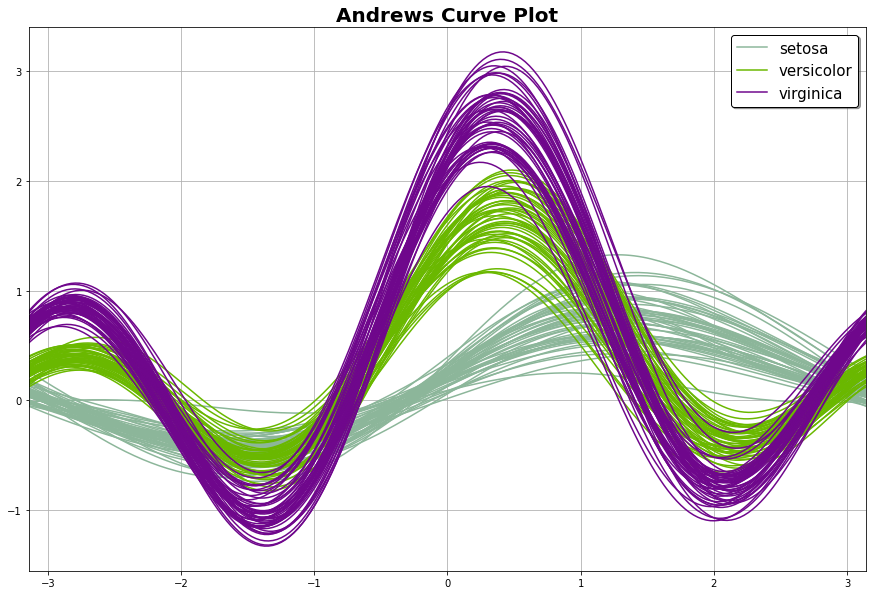

In [17]:
from pandas.plotting import andrews_curves
plt.figure(figsize= (15,10))
andrews_curves(dataset_fn.drop("species_id", axis=1), "species")
plt.title("Andrews Curve Plot", fontsize=20, fontweight = "bold")
plt.legend(loc=1, prop={'size':15 }, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

Statisticall : After Normalizing Dataset

Text(0.5, 1.0, 'Genral Statistics of Irsi Dataset')

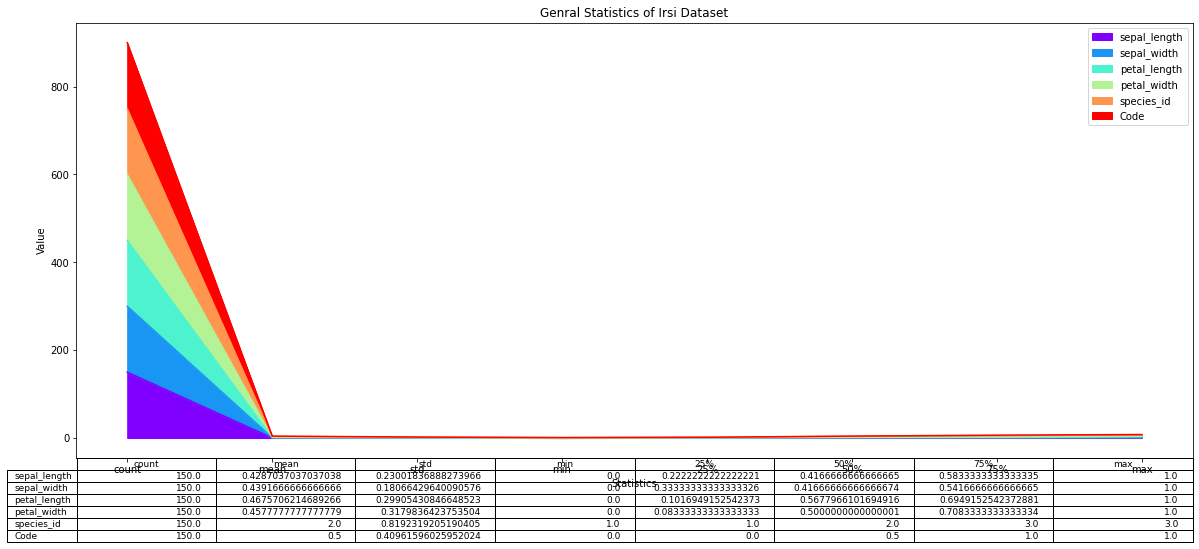

In [18]:
dataset_fn.describe().plot(kind = "area", fontsize = 10, figsize = (20,8), table = True, colormap = "rainbow")
plt.xlabel("Statistics",)
plt.ylabel("Value")
plt.title("Genral Statistics of Irsi Dataset")

# Calculate Similarity based on distance function of your choice

***Mean and Standard Deviation of the "Traing Set" and "Testing Set" for computing normalized euclidean distance.***

In [19]:
mean_TrainingSet = x_train.mean()
mean_TestSet = X_test.mean()
std_TrainginSet = x_train.std()
std_TestSet = X_test.std()
print("=========Mean of Traingin DataSet=======")
print (mean_TrainingSet.head())
print("=========Mean of Testing DataSet=====")
print (mean_TestSet.head())
print("========Standard Deviation of Training DataSet==========")
print (std_TrainginSet.head())
print("======Standard Deviation of Test DataSet===========")
print (std_TestSet.head())


=========Mean of Traingin DataSet=======
sepal_length    0.070681
sepal_width     0.029311
petal_length    0.060941
petal_width     0.057629
species_id      0.040825
dtype: float64
=========Mean of Testing DataSet=====
sepal_length   -0.282725
sepal_width    -0.117244
petal_length   -0.243764
petal_width    -0.230516
species_id     -0.163299
dtype: float64
========Standard Deviation of Training DataSet==========
sepal_length    1.046340
sepal_width     0.966206
petal_length    1.014449
petal_width     1.005129
species_id      1.003356
dtype: float64
======Standard Deviation of Test DataSet===========
sepal_length    0.759265
sepal_width     1.150587
petal_length    0.934178
petal_width     0.978802
species_id      1.003442
dtype: float64


In [20]:
training_class=list(x_train.iloc[:, -1])
test_class= list(X_test.iloc[:,-1])


*We are using "Normalized Euclidean Distance" and "Cosine Similarity" for distance function.* 

In [21]:
def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return (1-cos)

# **Define a function to return k- nearest neighbors**

In [22]:
def Knn_func(dataset, testInstance, k, dist_method, dataset_mean, dataset_std): 
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbors = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbors.append(sort_distances[x][0])
    # Initializing counts for 'class' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent class
    for x in range(len(neighbors)):
        response = dataset.iloc[neighbors[x]][-1] 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the class in reverse order to get the most frequest class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return(sort_counts[0][0])

Using trainging data set which we splited above. Iterating all of the training set data points and computing the class of each k and each distance matric.

In [23]:
row_list=[]
for index, rows in x_train.iterrows():
  my_list= [rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]
  row_list.append([my_list])
#k_n = [1, 3, 5, 6]
k_n=[1,2,3,6]
distance_methods = [ 'normalized_euclidean', 'cosine']
obs_k={}


In [24]:
for dist_method in distance_methods:
  training_set_obs_k = {}
  for k in k_n:
    training_set_obs=[]
    for i in range(len(row_list)):
      training_set_obs.append(Knn_func(x_train, pd.DataFrame(row_list[i]), k, dist_method, mean_TrainingSet, std_TrainginSet))
    training_set_obs_k[k]= training_set_obs
  obs_k[dist_method] = training_set_obs_k
  print(dist_method.upper() + " Distance Method performed on all K values")



NORMALIZED_EUCLIDEAN Distance Method performed on all K values
COSINE Distance Method performed on all K values


Accuracy on training set

   k  normalized_euclidean  cosine
0  1                 1.000   1.000
1  2                 1.000   1.000
2  3                 0.950   0.925
3  6                 0.975   0.925



Best k value is 2 and best distance metric is normalized_euclidean . Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting


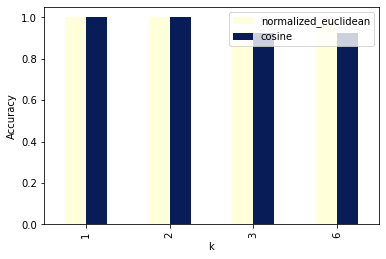

In [25]:
accuracy = {}
for key in obs_k.keys():
    accuracy[key] = {}
    for k_value in obs_k[key].keys():
        #print('k = ', key)
        count = 0
        for i,j in zip(training_class, obs_k[key][k_value]):
            if i == j:
                count = count + 1
            else:
                pass
        accuracy[key][k_value] = count/(len(training_class))

# Storing the accuracy for each k and each distance metric into a dataframe
df_res = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_res[key] = value
print(df_res)

# Plotting a Bar Chart for accuracy
draw = df_res.plot(x='k', y=[ 'normalized_euclidean', 'cosine'], kind="bar", colormap='YlGnBu')
draw.set(ylabel='Accuracy')

# Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting
df_res.loc[df_res['k'] == 1.0, ['normalized_euclidean', 'cosine']] = np.nan

# Fetching the best k value for using all hyper-parameters
# In case the accuracy is the same for different k and different distance metric selecting the first of all the same
column_val = [c for c in df_res.columns if not c.startswith('k')]
col_max = df_res[column_val].max().idxmax(0)
best_dist_method = col_max
row_max = df_res[col_max].argmax()
best_k = int(df_res.iloc[row_max]['k'])
if df_res.isnull().values.any():
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m. Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting')
else:
    print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m.')

In [26]:
print('\n\n\nBest k value is\033[1m', best_k, '\033[0mand best distance metric is\033[1m', best_dist_method, '\033[0m')




Best k value is 2 and best distance metric is normalized_euclidean 


# **Test the KNN Algorithm on the test dataset**

In [27]:
row_list_test = []
for index, rows in X_test.iterrows(): 
    my_list =[rows.sepal_length, rows.sepal_width, rows.petal_length, rows.petal_width]       
    row_list_test.append([my_list])
test_set_obs = []
for i in range(len(row_list_test)):
    test_set_obs.append(Knn_func(X_test, pd.DataFrame(row_list_test[i]), best_k, best_dist_method,mean_TestSet, std_TestSet))
#print(test_set_obs)

count = 0
for i,j in zip(test_class, test_set_obs):
    if i == j:
        count = count + 1
    else:
        pass
accuracy_test = count/(len(test_class))
print('Final Accuracy of the Test dataset is ', accuracy_test)

Final Accuracy of the Test dataset is  1.0


# Perform hyper-parameter tuning using K-fold Cross Validation

In [28]:
# sensitivity analysis of k in k-fold cross-validation
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

Ideal: 1.000
> folds=2, accuracy=0.800 (0.600,1.000)
> folds=3, accuracy=1.000 (1.000,1.000)
> folds=4, accuracy=0.969 (0.875,1.000)
> folds=5, accuracy=1.000 (1.000,1.000)
> folds=6, accuracy=0.967 (0.800,1.000)
> folds=7, accuracy=1.000 (1.000,1.000)
> folds=8, accuracy=1.000 (1.000,1.000)
> folds=9, accuracy=1.000 (1.000,1.000)
> folds=10, accuracy=1.000 (1.000,1.000)
> folds=11, accuracy=1.000 (1.000,1.000)
> folds=12, accuracy=1.000 (1.000,1.000)
> folds=13, accuracy=1.000 (1.000,1.000)
> folds=14, accuracy=1.000 (1.000,1.000)
> folds=15, accuracy=1.000 (1.000,1.000)
> folds=16, accuracy=1.000 (1.000,1.000)
> folds=17, accuracy=1.000 (1.000,1.000)
> folds=18, accuracy=1.000 (1.000,1.000)
> folds=19, accuracy=1.000 (1.000,1.000)
> folds=20, accuracy=1.000 (1.000,1.000)
> folds=21, accuracy=1.000 (1.000,1.000)
> folds=22, accuracy=1.000 (1.000,1.000)
> folds=23, accuracy=1.000 (1.000,1.000)
> folds=24, accuracy=1.000 (1.000,1.000)
> folds=25, accuracy=1.000 (1.000,1.000)
> folds=26,

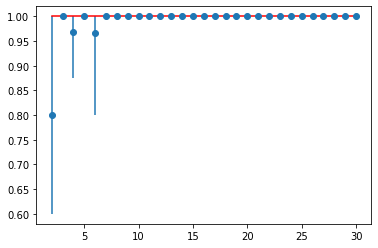

In [29]:
def get_model():
	model = KNeighborsClassifier()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X_test, Y_test, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()




```
From the above , we can found that the by keeping any k value the accuracy is same.
```



# Use the test set and the optimal hyper-parameters to compute the final accuracy.

In [30]:

from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

knn = neighbors.KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(X_test)

print(accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0 10  0]
 [ 0  0  8]]


The Accuracy od the Knn model is 100%. The Precision,Recall values is also 100%. So this is a very good model . The K value in KNN is 2.